# Lab 7: Convolutions and Convolutional neural networks

```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
In this lab, you will practice simple deep learning model in Pytorch.

Lab Plan
1. Convolutions - application examples
2. Building CNN in PyTorch
    - example CNN
    - comparing with Fully-connected NN

```

<hr>

## 1. Recap

1. What is the use of convolutions? (In general)
2. Why use convolutional layers instead of fully-connected ones?



## 2. Convolutions
Let's upload some image (you can try your own image changing the url)

In [ ]:
import urllib.request
url = "https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/lss423kothpqpjpwbzg0"
filename = 'grid_img.jpg'
urllib.request.urlretrieve(url, filename)

('grid_img.jpg', <http.client.HTTPMessage at 0x7f97af733340>)

## 2. Reading image data

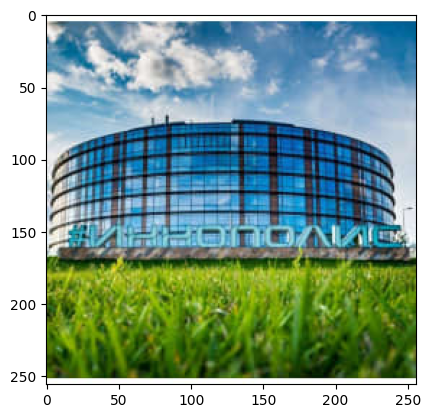

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

# Let's read and plot the image
image = plt.imread('grid_img.jpg')
plt.imshow(image)

## 2.1 Operations on Image Data

original img shape:  (256, 256, 3)
grayscale img shape (256, 256)


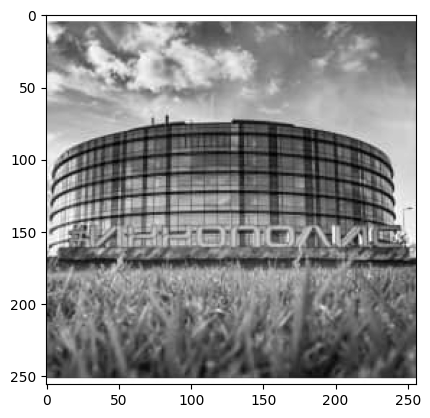

In [ ]:
gray_image = rgb2gray(image)
plt.imshow(gray_image * 100, cmap='gray')
print("original img shape: ", image.shape)
print("grayscale img shape", gray_image.shape)

## 2.2 Convolutions for edge-detecting

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] is a kernel for detecting vertical edges


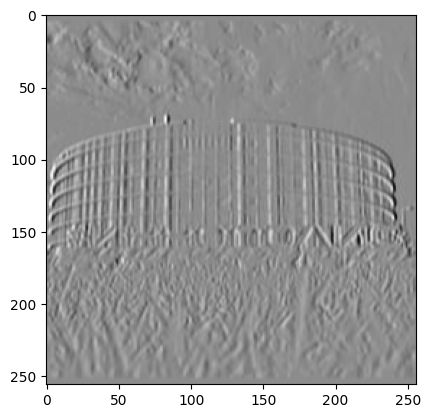

In [ ]:
# first, let's define edge-detecting filters
horizontal_kernel = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])
print(horizontal_kernel, 'is a kernel for detecting horizontal edges')

vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
print(vertical_kernel, 'is a kernel for detecting vertical edges')

out_h = ndimage.convolve(gray_image, horizontal_kernel, mode='reflect')
plt.imshow(out_h * 100, cmap='gray')
out_v = ndimage.convolve(gray_image, vertical_kernel, mode='reflect')
plt.imshow(out_v * 100, cmap='gray')

Let's apply different types of convolutions on this image. Complete the following function.

Take care of dimensions - the resuting image should be of the same size.
Hint:

![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)

Horizontal kernel applied


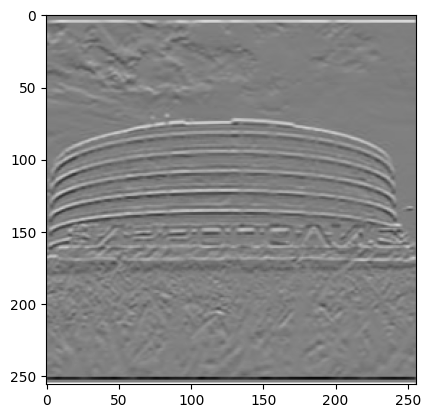

In [ ]:
# apply kernel on input image such that the image size is preserved
def convolve(img, kernel):
    w, h = img.shape[0], img.shape[1]
    f = kernel.shape[0]
    if (f - 1) % 2 !=0 :
        print("failure to choose apt padding, choose another filter size!")
    padding = (f - 1)//2
    padded_img = np.lib.pad(img, ((padding, padding), (padding, padding)), 'constant', constant_values = ((0,0),(0,0)))
    result = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            # we chose padding size such that when sliding through the padded image
            # with the kernel we obtain exactly same dimensionality (w x h)
            result[i,j] = np.sum(padded_img[i:i + f, j:j+f] * kernel)
    return result

c = convolve(gray_image, horizontal_kernel)
print("Horizontal kernel applied")
plt.imshow(c, cmap='gray')

Vertical kernel applied


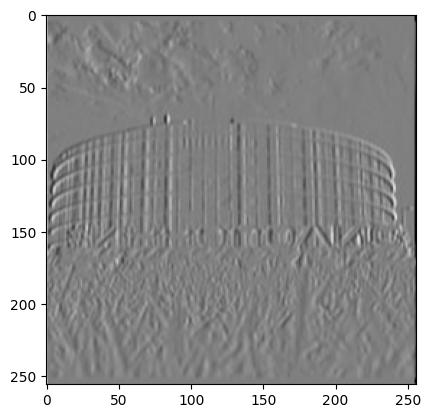

In [ ]:
c = convolve(gray_image, vertical_kernel)
print("Vertical kernel applied")
plt.imshow(c, cmap='gray')

Your kernel applied


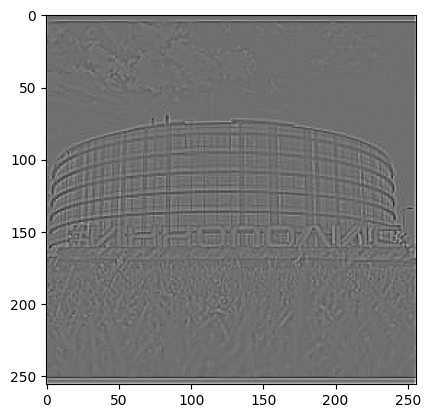

In [ ]:
# play with numbers, see how changing the kernel affects the result
your_kernel = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

c = convolve(gray_image, your_kernel)
print("Your kernel applied")
plt.imshow(c, cmap='gray')

some_kernel = np.array([[-1]])

Negative kernel applied


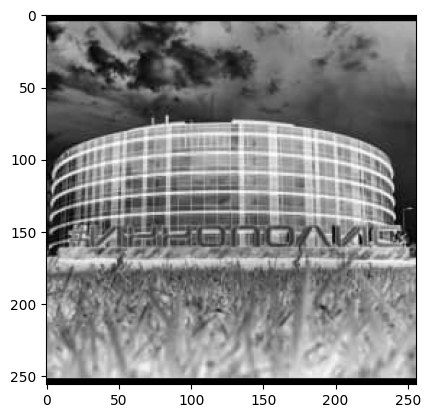

In [ ]:
# Define the kernel that will result in reversed image, in which the lightest areas of
# the photographed subject appear darkest and the darkest areas appear the lightest.
negative_kernel = np.array([[-1]])

c = convolve(gray_image, negative_kernel)
print("Negative kernel applied")
plt.imshow(c, cmap='gray')

### Define the kernel that will result in a blurred image

Blur kernel applied


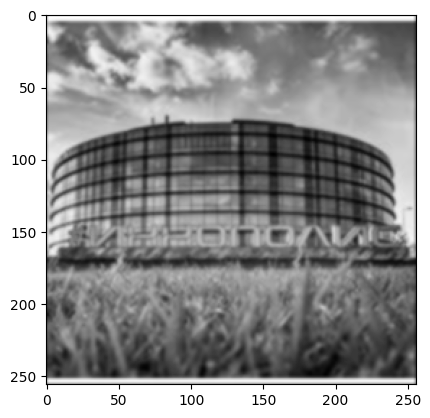

In [ ]:
# Define the kernel that will result in a blurred image
v1 = 0.5
v = 0.1
# this is an example of ~ gaussian blur
blur_kernel = np.array([[v, v, v, v, v],
                        [v, v1, v1, v1, v],
                        [v, v1, 2, v1, v],
                        [v, v1, v1, v1, v],
                        [v, v, v, v, v]])

#simple sum
blur_kernel2 = np.ones((11,11))

c_blurred = convolve(gray_image, blur_kernel)
print("Blur kernel applied")
plt.imshow(c_blurred, cmap='gray')

Sharpen kernel applied


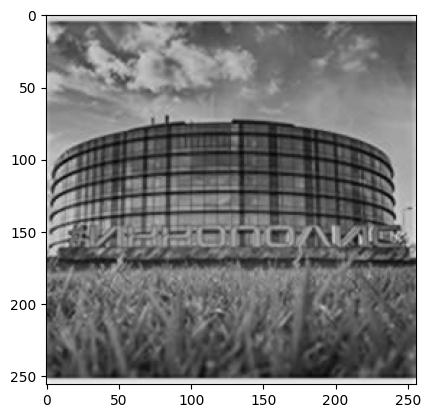

In [ ]:
# Now let's sharpen the blurred image back
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

c = convolve(c_blurred, sharpen_kernel)
print("Sharpen kernel applied")
plt.imshow(c, cmap='gray')

## 3. CNN with PyTorch

### 3.1. Data Loading

In [ ]:
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

batch_size = 32
test_batch_size = 100

# Transformations
data_transformations = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])

# Data Source
mnist_train = datasets.MNIST('../data', train=True, download=True,
                       transform=data_transformations)
mnist_test = datasets.MNIST('../data', train=False,
                            transform=data_transformations)


# Data loaders
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 175619086.27it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29161216.62it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37679130.67it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21846936.66it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



### 3.2 CNN model

In [ ]:
class CNN(nn.Module):
    # Convolution formula: ((n + 2p - f) / s) + 1

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) #28*28*1 -> 24*24*10 -> 12*12*10
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) #12*12*10 -> 8*8*20 -> 4*4*20
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)  # 4*4*20 = 320
        self.fc2 = nn.Linear(50, 10)
        self.fc_drop = nn.Dropout(p=0.5)

    def forward(self, x):
        # Exercise: calclulate shape after each layer
        x = torch.relu(torch.nn.functional.max_pool2d(self.conv1(x), kernel_size=2)) #[32, 10, 12, 12] batch_size / filters/ size of picture
        x = torch.relu(torch.nn.functional.max_pool2d(self.conv2_drop(self.conv2(x)), kernel_size=2)) #[32, 20, 4, 4]
        x = x.view(-1, 320)
        x = self.fc_drop(torch.relu(self.fc1(x)))
        x = torch.relu(self.fc2(x))
        return torch.nn.functional.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = CNN().to(device)

## 2.2 Fully-conected model from the last class

 TASK: reducing number of params to match that of CNN

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: reducing number of params to match that of CNN
        self.fc1 = torch.nn.Linear(28*28, 500)
        self.fc2 = torch.nn.Linear(500, 250)
        self.fc3 = torch.nn.Linear(250, 100)
        self.fc4 = torch.nn.Linear(100, 50)
        self.fc5 = torch.nn.Linear(50, 10)

    def forward(self, x):
        # TODO: implement forward pass
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))

        return torch.nn.functional.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_nn = Net().to(device)

### Counting number of model trainable parameters

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
# Let's compare the number of parameters of these models:
print("Number of params in the Fully-connected model:", count_parameters(model_nn))
print("Number of params in the CNN model:", count_parameters(model_cnn))

Number of params in the Fully-connected model: 548410
Number of params in the CNN model: 21840


Task: Try changing the fully-connected model to have the same number of parameters as CNN and compare the resulting performance

## 3. Training and testing

In [ ]:
def train(model, device, train_loader, optimizer, epoch, log_interval=700):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

## Training the CNN model

In [ ]:
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 700

# training CNN model
model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    test(model, device, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

<ipython-input-21-19c92bfdca8f>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.271540
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.867848
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.254765

Test set: Average loss: 0.1305, Accuracy: 9620/10000 (96.20%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.263535
Train Epoch: 2 [22400/60000 (37%)]	Loss: 0.218043
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.368163

Test set: Average loss: 0.0855, Accuracy: 9725/10000 (97.25%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.410562
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.325257
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.273116

Test set: Average loss: 0.0728, Accuracy: 9784/10000 (97.84%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.165141
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.201265
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.229381

Test set: Average loss: 0.0632, Accuracy: 9790/10000 (97.90%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.179086
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.524790
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.498421

Test set: Average 

## Train the fully-connected model

In [ ]:
model = model_nn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    test(model, device, test_loader)

torch.save(model.state_dict(), "mnist_nn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318626
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.456686
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.393825

Test set: Average loss: 0.1898, Accuracy: 9430/10000 (94.30%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.131079
Train Epoch: 2 [22400/60000 (37%)]	Loss: 0.400844
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.058893

Test set: Average loss: 0.1251, Accuracy: 9619/10000 (96.19%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.222583
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.071327
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.172506

Test set: Average loss: 0.0944, Accuracy: 9708/10000 (97.08%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.027012
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.032685
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.072402

Test set: Average loss: 0.0923, Accuracy: 9716/10000 (97.16%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.043131
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.196220
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.098528

Test set: Average 

## Self-practice Task

Train a CNN model and predict the categories in `Caltech 256` dataset:
1. Load the data from `torchvision.datasets.Caltech256`
1. Split the data to train, validation and test
1. Define a CNN model with achitecture of your choice
1. Train the model and log the loss and accuracy at every epoch (on train, validation and test set)
1. Use a pretrained (such as `VGG16`) model for the same task and compare the models number of parameters together with accuracy

In [ ]:
from torch.nn.modules.loss import TripletMarginLoss
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
from sklearn.model_selection import train_test_split

batch_size = 50

# Transformations
data_transformations = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    #transforms.RandomHorizontalFlip(), # Случайно (p=0.5) зеркалим изображение
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Data Source
caltech256_dataset = datasets.Caltech256(root='./data', download=True, transform=data_transformations)
#total_samples = len(caltech256_dataset)
#half_samples = total_samples // 2  # Use half of the samples

# Split into two subsets
#train_dataset, _ = random_split(caltech256_dataset, [half_samples, total_samples - half_samples])
subset_dataset = Subset(caltech256_dataset, list(range(15000)))

RuntimeError: ignored

In [ ]:
import numpy as np

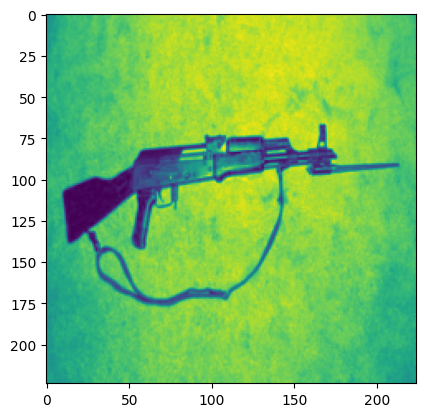

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(iter(subset_dataset))
plt.imshow(images[2])

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
dataset_size = 15000
validation_split = 0.2
shuffle_dataset = True
random_seed= 40

indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(subset_dataset, batch_size=batch_size,
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(subset_dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

In [ ]:
class CNN(nn.Module):
    # Convolution formula: ((n + 2p - f) / s) + 1

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=9) #224*224*3 -> 216*216*10 -> 108*108*10
        self.conv2 = nn.Conv2d(10, 20, kernel_size=9) #108*108*10 -> 100*100*20 -> 50*50*20
        self.conv2_drop = nn.Dropout2d(p=0.7)
        self.conv3 = nn.Conv2d(20, 25, kernel_size=9) #50*50*25 -> 42*42*25 -> 21*21*25
        self.conv3_drop = nn.Dropout2d(p=0.4)
        self.conv4 = nn.Conv2d(25, 30, kernel_size=9) #21*21*30 -> 13*13*30 -> 6*6*30
        self.conv4_drop = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(1080, 500)  # 6*6*30 = 1080
        self.fc2 = nn.Linear(500, 256)
        self.fc_drop = nn.Dropout(p=0.2)

    def forward(self, x):
        # Exercise: calclulate shape after each layer
        x = torch.relu(torch.nn.functional.max_pool2d(self.conv1(x), kernel_size=2)) #[32, 10, 12, 12] batch_size / filters/ size of picture
        x = torch.relu(torch.nn.functional.max_pool2d(self.conv2_drop(self.conv2(x)), kernel_size=2)) #
        x = torch.relu(torch.nn.functional.max_pool2d(self.conv3_drop(self.conv3(x)), kernel_size=2)) #
        x = torch.relu(torch.nn.functional.max_pool2d(self.conv4_drop(self.conv4(x)), kernel_size=2)) #
        x = x.view(-1, 1080)
        x = self.fc_drop(torch.relu(self.fc1(x)))
        x = torch.relu(self.fc2(x))
        return torch.nn.functional.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = CNN().to(device)

In [ ]:
def train(model, device, train_loader, optimizer, epoch, log_interval=700):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
epochs = 5
lr = 0.01
momentum = 0.5
log_interval = 700

# training CNN model
model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    test(model, device, validation_loader)

torch.save(model.state_dict(), "caltech_cnn.pt")

<ipython-input-10-f454bae209cc>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.log_softmax(x)


Train Epoch: 1 [0/15000 (0%)]	Loss: 5.327152

Test set: Average loss: 1.0390, Accuracy: 68/15000 (0.45%)

Train Epoch: 2 [0/15000 (0%)]	Loss: 5.208588

Test set: Average loss: 1.0152, Accuracy: 75/15000 (0.50%)

Train Epoch: 3 [0/15000 (0%)]	Loss: 5.041542

Test set: Average loss: 0.9956, Accuracy: 83/15000 (0.55%)

Train Epoch: 4 [0/15000 (0%)]	Loss: 4.985614

Test set: Average loss: 0.9831, Accuracy: 94/15000 (0.63%)

Train Epoch: 5 [0/15000 (0%)]	Loss: 4.957765

Test set: Average loss: 0.9835, Accuracy: 113/15000 (0.75%)



In [ ]:
def fit(model, train_dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
    train_loss = train_running_loss/len(train_dataloader.dataset)
    train_accuracy = 100. * train_running_correct/len(train_dataloader.dataset)
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')

    return train_loss, train_accuracy

In [ ]:
def validate(model, test_dataloader):
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    for int, data in enumerate(test_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)

        val_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        val_running_correct += (preds == target).sum().item()

    val_loss = val_running_loss/len(test_dataloader.dataset)
    val_accuracy = 100. * val_running_correct/len(test_dataloader.dataset)

    return val_loss, val_accuracy

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Let's compare the number of parameters of these models:
print("Number of params in the VGG16 model:", count_parameters(vgg16))
print("Number of params in the CNN model:", count_parameters(model_cnn))

###FROM KAGGLE

In [ ]:
from torch.nn.modules.loss import TripletMarginLoss
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
from sklearn.model_selection import train_test_split

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")


!pip install opendatasets --upgrade --quiet

import opendatasets as od

dataset_url = 'https://www.kaggle.com/jessicali9530/caltech256'

od.download(dataset_url)

Skipping, found downloaded files in "./caltech256" (use force=True to force download)


In [ ]:
image_dataset = datasets.ImageFolder('caltech256')

In [ ]:
def split_dataset(ds, split):
    train_idx, val_idx = train_test_split(list(range(len(ds))), test_size=split, stratify=ds.targets, random_state=42)
    train = Subset(ds, train_idx)
    val = Subset(ds, val_idx)
    return val, train

In [ ]:
from torch.utils.data import Dataset, Subset
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)), # Изменяем размер изображения до 224x224
        transforms.ToTensor(), # Формируем из изображения тензор
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # нормализуем тензор со средним значением и стандартным отклонением
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [ ]:
val, train = split_dataset(ds=image_dataset, split=0.2)
val = DatasetFromSubset(val, transform = data_transforms['val'])
train = DatasetFromSubset(train, transform = data_transforms['train'])
image_datasets = {
    'val':  val,
    'train': train,
}

bs = 64 # Размер батча

train_loader = DataLoader(image_datasets['train'], batch_size=bs,shuffle=True, num_workers=1)
val_loader = DataLoader(image_datasets['val'], batch_size=bs,shuffle=True, num_workers=1)


# Получаем список классов
class_names = image_dataset.classes

In [ ]:
from torchvision import models
vgg16 = models.vgg16(pretrained=True)
vgg16.to(device)

vgg16.classifier[6].out_features = 256
# freeze convolution weights
for param in vgg16.features.parameters():
    param.requires_grad = False

optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001, momentum=0.9)
# loss function
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import time
train_loss , train_accuracy = [], []
val_loss , val_accuracy = [], []
start = time.time()
for epoch in range(10):
    train_epoch_loss, train_epoch_accuracy = fit(vgg16, train_loader)
    val_epoch_loss, val_epoch_accuracy = validate(vgg16, val_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
end = time.time()
print((end-start)/60, 'minutes')

Train Loss: 0.0152, Train Acc: 48.36
Train Loss: 0.0115, Train Acc: 49.53
Train Loss: 0.0113, Train Acc: 49.50
Train Loss: 0.0113, Train Acc: 49.57
Train Loss: 0.0112, Train Acc: 49.35
Train Loss: 0.0112, Train Acc: 50.15
Train Loss: 0.0112, Train Acc: 49.67
Train Loss: 0.0111, Train Acc: 50.07
Train Loss: 0.0111, Train Acc: 49.87
Train Loss: 0.0111, Train Acc: 50.27
62.29271008968353 minutes


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Let's compare the number of parameters of these models:
print("Number of params in the VGG16 model:", count_parameters(vgg16))
#print("Number of params in the CNN model:", count_parameters(model_cnn))

Number of params in the VGG16 model: 123642856
